In [1]:
#核心代码来自微信号gh_30599cd767ee，野生交易员的试炼之路。
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline #魔法命令，用于在jupyter 环境中正常显示图表
plt.rcParams['font.sans-serif']=['SimHei'] #用来在图中正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来在图中正常显示负号

datename = '180101To220825'
pricefilename = '{}{}{}'.format('data/price_',datename,'.pkl')
premfilename = '{}{}{}'.format('data/prem_',datename,'.pkl')
sizefilename = '{}{}{}'.format('data/size_',datename,'.pkl')
day_returnfilename = '{}{}{}'.format('data/day_return_',datename,'.pkl')
price100filename = '{}{}{}'.format('data/price100_',datename,'.pkl')
prem100filename = '{}{}{}'.format('data/prem100_',datename,'.pkl')
size100filename = '{}{}{}'.format('data/size100_',datename,'.pkl')
priceRankfilename = '{}{}{}'.format('data/priceRank_',datename,'.pkl')
premRankfilename = '{}{}{}'.format('data/premRank_',datename,'.pkl')
sizeRankfilename = '{}{}{}'.format('data/sizeRank_',datename,'.pkl')

pricedf=pd.read_pickle(pricefilename)  #读取收盘价矩阵
premdf=pd.read_pickle(premfilename)    #读取溢价率矩阵。
sizedf=pd.read_pickle(sizefilename)    #读取余额矩阵。
day_return=pd.read_pickle(day_returnfilename)  #读取收益率矩阵
price100df=pd.read_pickle(price100filename)  #读取收盘价百分数矩阵
prem100df=pd.read_pickle(prem100filename)    #读取溢价率百分数矩阵。
size100df=pd.read_pickle(size100filename)    #读取余额百分数矩阵。
priceRankdf=pd.read_pickle(priceRankfilename)  #读取收盘价排名矩阵
premRankdf=pd.read_pickle(premRankfilename)    #读取溢价率排名矩阵。
sizeRankdf=pd.read_pickle(sizeRankfilename)    #读取余额排名矩阵。

In [2]:
#通过筛选每日最低的N个转债来得到信号矩阵
def selectTopN(tmp):
    tmp=tmp.copy()
    symbols=tmp.nsmallest(N).index
    tmp[:]=0
    tmp[symbols]=1
    return tmp

<AxesSubplot:title={'center':'双低直接相加'}, xlabel='tradeDate'>

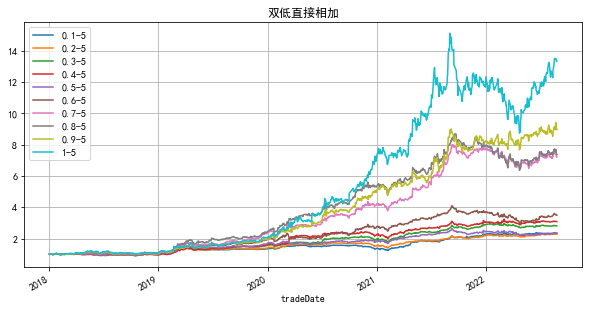

In [3]:
pnl=pd.DataFrame()
N = 5
for k in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    for freq in [5]:
        factor=k*premdf+(1-k)*pricedf
        signal=factor.apply(selectTopN,axis=1)
        tmpdf=signal.iloc[range(0,len(signal),freq)]
        week_selected_df=pd.DataFrame(index=signal.index)
        week_selected_df=week_selected_df.join(tmpdf)
        week_selected_df=week_selected_df.fillna(method='pad')
        a=str(k)+"-"+str(freq)
        pnl[a]=(week_selected_df*day_return).sum(axis=1)/N  
(pnl+1).cumprod().plot(figsize=(10,5),grid=True,title="双低直接相加")

<AxesSubplot:title={'center':'三低直接相加'}, xlabel='tradeDate'>

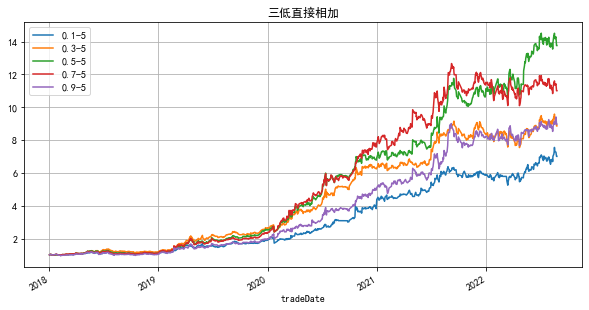

In [10]:
pnl=pd.DataFrame()
for k in [0.1,0.3,0.5,0.7,0.9]:
    for freq in [5]:
        factor=k*premdf+(k/9)*pricedf+(1-k-k/9)*sizedf
        signal=factor.apply(selectTopN,axis=1)
        tmpdf=signal.iloc[range(0,len(signal),freq)]
        week_selected_df=pd.DataFrame(index=signal.index)
        week_selected_df=week_selected_df.join(tmpdf)
        week_selected_df=week_selected_df.fillna(method='pad')
        a=str(k)+"-"+str(freq)
        pnl[a]=(week_selected_df*day_return).sum(axis=1)/N  
(pnl+1).cumprod().plot(figsize=(10,5),grid=True,title="三低直接相加")

<AxesSubplot:title={'center':'双低排名相加'}, xlabel='tradeDate'>

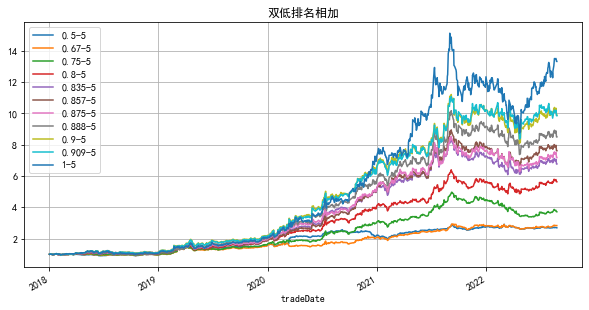

In [5]:
pnl=pd.DataFrame()
for k in [0.5,0.67,0.75,0.8,0.835,0.857,0.875,0.888,0.9,0.909,1]:
    for freq in [5]:
        factor=k*premRankdf+(1-k)*priceRankdf
        signal=factor.apply(selectTopN,axis=1)
        tmpdf=signal.iloc[range(0,len(signal),freq)]
        week_selected_df=pd.DataFrame(index=signal.index)
        week_selected_df=week_selected_df.join(tmpdf)
        week_selected_df=week_selected_df.fillna(method='pad')
        a=str(k)+"-"+str(freq)
        pnl[a]=(week_selected_df*day_return).sum(axis=1)/N  
(pnl+1).cumprod().plot(figsize=(10,5),grid=True,title="双低排名相加")

<AxesSubplot:title={'center':'三低排名相加'}, xlabel='tradeDate'>

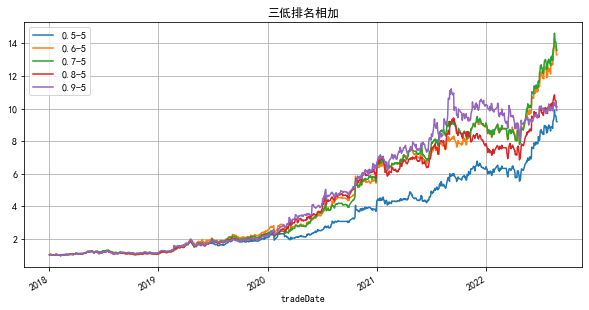

In [6]:
pnl=pd.DataFrame()
for k in [0.5,0.6,0.7,0.8,0.9]:
    for freq in [5]:
        factor=k*premRankdf+(k/9)*priceRankdf+(1-k-k/9)*sizeRankdf
        signal=factor.apply(selectTopN,axis=1)
        tmpdf=signal.iloc[range(0,len(signal),freq)]
        week_selected_df=pd.DataFrame(index=signal.index)
        week_selected_df=week_selected_df.join(tmpdf)
        week_selected_df=week_selected_df.fillna(method='pad')
        a=str(k)+"-"+str(freq)
        pnl[a]=(week_selected_df*day_return).sum(axis=1)/N  
(pnl+1).cumprod().plot(figsize=(10,5),grid=True,title="三低排名相加")

In [7]:
def selectTopN100(tmp):  #选最大值！
    tmp=tmp.copy()
    symbols=tmp.nlargest(N).index
    tmp[:]=0
    tmp[symbols]=1
    return tmp

<AxesSubplot:title={'center':'双低百分数相加'}, xlabel='tradeDate'>

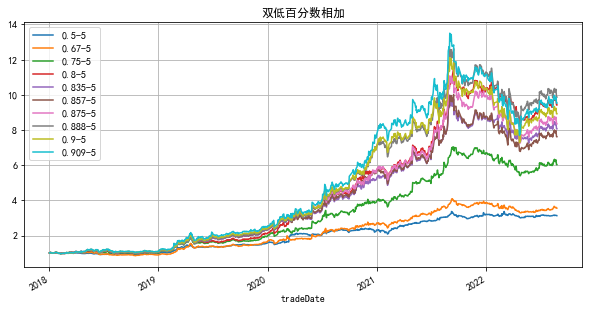

In [8]:
pnl=pd.DataFrame()
for k in [0.5,0.67,0.75,0.8,0.835,0.857,0.875,0.888,0.9,0.909]:
    for freq in [5]:
        factor=k*prem100df+(1-k)*price100df
        signal=factor.apply(selectTopN100,axis=1)
        tmpdf=signal.iloc[range(0,len(signal),freq)]
        week_selected_df=pd.DataFrame(index=signal.index)
        week_selected_df=week_selected_df.join(tmpdf)
        week_selected_df=week_selected_df.fillna(method='pad')
        a=str(k)+"-"+str(freq)
        pnl[a]=(week_selected_df*day_return).sum(axis=1)/N  
(pnl+1).cumprod().plot(figsize=(10,5),grid=True,title="双低百分数相加")

<AxesSubplot:title={'center':'三低百分数相加'}, xlabel='tradeDate'>

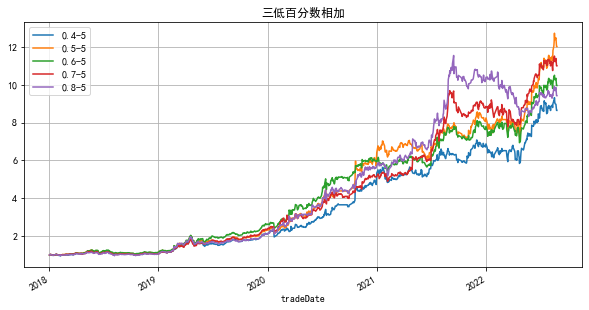

In [9]:
pnl=pd.DataFrame()
for k in [0.4,0.5,0.6,0.7,0.8]:
    for freq in [5]:
        factor=k*prem100df+(k/4)*price100df+(1-k-k/4)*size100df
        signal=factor.apply(selectTopN100,axis=1)
        tmpdf=signal.iloc[range(0,len(signal),freq)]
        week_selected_df=pd.DataFrame(index=signal.index)
        week_selected_df=week_selected_df.join(tmpdf)
        week_selected_df=week_selected_df.fillna(method='pad')
        a=str(k)+"-"+str(freq)
        pnl[a]=(week_selected_df*day_return).sum(axis=1)/N  
(pnl+1).cumprod().plot(figsize=(10,5),grid=True,title="三低百分数相加")